## Classical Mechanics - Week 9

### Last Week:
- We saw how a potential can be used to analyze a system
- Gained experience with plotting and integrating in Python 

### This Week:
- We will study harmonic oscillations using packages
- Further develope our analysis skills 
- Gain more experience wtih sympy

In [1]:
# Let's import packages, as usual
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing(use_unicode=True)

Let's analyze a spring using sympy. It will have mass $m$, spring constant $k$, angular frequency $\omega_0$, initial position $x_0$, and initial velocity $v_0$.

The motion of this harmonic oscillator is described by the equation:

eq 1.) $m\ddot{x} = -kx$

This can be solved as 

eq 2.) $x(t) = A\cos(\omega_0 t - \delta)$, $\qquad \omega_0 = \sqrt{\dfrac{k}{m}}$

Use SymPy below to plot this function. Set $A=2$, $\omega_0 = \pi/2$ and $\delta = \pi/4$. 

(Refer back to ***Notebook 7*** if you need to review plotting with SymPy.)

In [2]:
# Plot for equation 2 here
A, omega0, t, delta = sym.symbols('A, omega_0, t, delta')
x=A*sym.cos(omega0*t-delta)
x

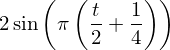

In [3]:
x1 = sym.simplify(x.subs({A:2, omega0:sym.pi/2, delta:sym.pi/4}))
x1

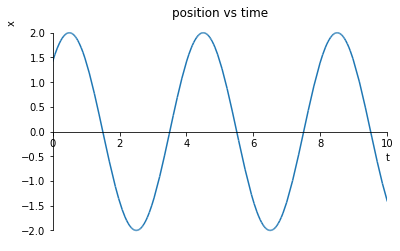

In [4]:
sym.plot(x1,(t,0,10), title='position vs time',xlabel='t',ylabel='x')

## Q1.) Calculate analytically the initial conditions, $x_0$ and $v_0$, and the period of the motion for the given constants.  Is your plot consistent with these values?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible answers #######

Initial position $x_0=2\cos(-\pi/4)=\sqrt{2}$.

Initial velocity $v_0=-2(\pi/2)\sin(-\pi/4)=\pi/\sqrt{2}$.

The period is $2\pi/(\pi/2)=4$.

The initial position and the period are easily seen to agree with these values.  The initial velocity is
positive and the initial slope looks like it agrees.

####### Possible answers #######

#### Now let's make plots for underdamped, critically-damped, and overdamped harmonic oscillators.
Below are the general equations for these oscillators:

- Underdamped, $\beta < \omega_0$ : 

eq 3.)    $x(t) = A e^{-\beta t}cos(\omega ' t) + B e^{-\beta t}sin(\omega ' t)$ , $\omega ' = \sqrt{\omega_0^2 - \beta^2}$
 
 ___________________________________
 
 
- Critically-damped, $\beta = \omega_0$:

eq 4.)    $x(t) = Ae^{-\beta t} + B t e^{-\beta t}$

 ___________________________________
 
- Overdamped, $\beta > \omega_0$:

eq 5.)    $x(t) = Ae^{-\left(\beta + \sqrt{\beta^2 - \omega_0^2}\right)t} + Be^{-\left(\beta - \sqrt{\beta^2 - \omega_0^2}\right)t}$
    
 _______________________
 
In the cells below use SymPy to create the Position vs Time plots for these three oscillators. 

Use $\omega_0=\pi/2$ as before, and then choose an appropriate value of $\beta$ for the three different damped oscillator solutions. Play around with the variables, $A$, $B$, and $\beta$, to see how different values affect the motion and if this agrees with your intuition. 

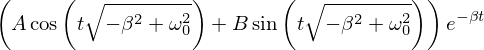

In [5]:
# Put your code for graphing Underdamped here
A, B, omega0, beta, t = sym.symbols('A, B, omega_0, beta, t')
omegap=sym.sqrt(omega0**2-beta**2)
x=sym.exp(-beta*t)*(A*sym.cos(omegap*t)+B*sym.sin(omegap*t))
x

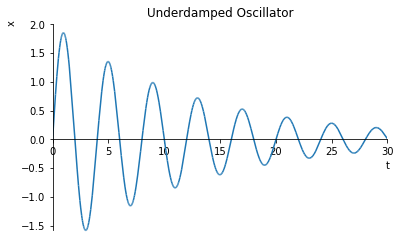

In [6]:
x1 = sym.simplify(x.subs({A:0, B:2, omega0:sym.pi/2, beta:sym.pi/40}))
sym.plot(x1,(t,0,30), title='Underdamped Oscillator',xlabel='t',ylabel='x')

In [7]:
# Put your code for graphing Critical here
A, B, omega0, beta, t = sym.symbols('A, B, omega_0, beta, t')
x=sym.exp(-beta*t)*(A+B*t)
x

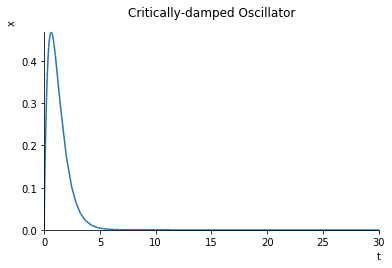

In [8]:
x1 = sym.simplify(x.subs({A:0, B:2, omega0:sym.pi/2, beta:sym.pi/2}))
sym.plot(x1,(t,0,30), title='Critically-damped Oscillator',xlabel='t',ylabel='x')

In [9]:
# Put your code for graphing Overdamped here
A, B, omega0, beta, t = sym.symbols('A, B, omega_0, beta, t')
beta1=beta+sym.sqrt(beta**2-omega0**2)
beta2=beta-sym.sqrt(beta**2-omega0**2)
x=A*sym.exp(-beta1*t)+B*sym.exp(-beta2*t)
x

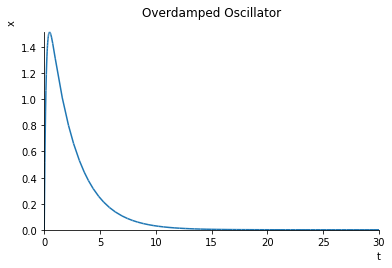

In [10]:
x1 = sym.simplify(x.subs({A:-2, B:2, omega0:sym.pi/2, beta:sym.pi}))
sym.plot(x1,(t,0,30), title='Overdamped Oscillator',xlabel='t',ylabel='x')

## Q2.) How would you compare the 3 different oscillators?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.


####### Possible answers #######

Underdamped: Oscillations, with amplititude decreasing over time

Critical Damping: No oscillations. Curve dies the fastest of the three (for fixed $\omega_0$).

Overdamped: No oscillations. Curve dies slower than critically damped case.

####### Possible answers #######

# Here's another simple harmonic system, the pendulum. 

The equation of motion for the pendulum is:

eq 6.) $ml\dfrac{d^2\theta}{dt^2} + mg \sin(\theta) = 0$, where $v=l\dfrac{d\theta}{dt}$ and $a=l\dfrac{d^2\theta}{dt^2}$

In the small angle approximation $\sin\theta\approx\theta$, so this can be written:

eq 7.) $\dfrac{d^2\theta}{dt^2} = -\dfrac{g}{l}\theta$

We then find the period of the pendulum to be $T = \dfrac{2\pi}{\sqrt{l/g}}$ and the angle at any given time 
(if released from rest) is given by 

$\theta = \theta_0\cos{\left(\sqrt{\dfrac{g}{l}} t\right)}$.

Let's use Euler's Forward method to solve equation (7) for the motion of the pendulum in the small angle approximation, and compare to the analytic solution.

First, let's graph the analytic solution for $\theta$. Go ahead and graph using either sympy, or the other method we have used, utilizing these variables:

- $t:(0s,50s)$
- $\theta_0 = 0.5$ radians
- $l = 40$ meters

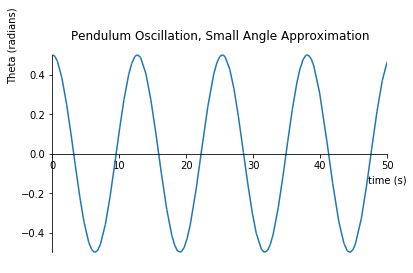

In [11]:
# Plot the analytic solution here
l=40
g=9.81


theta0, omega0, t = sym.symbols('theta_0, omega_0, t')
theta = theta0*sym.cos(omega0*t)
theta1 = sym.simplify(theta.subs({omega0:(g/l)**0.5,theta0:0.5}))
sym.plot(theta1,(t,0,50),title='Pendulum Oscillation, Small Angle Approximation',xlabel='time (s)',ylabel='Theta (radians)')
plt.show()




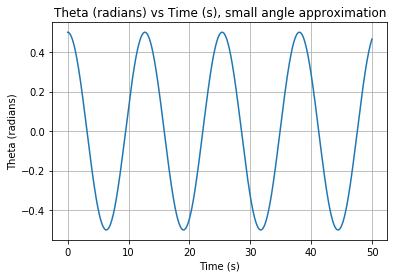

In [12]:
# The same analytic plot, but now using matplotlib
# This is easier for comparing with the Euler's method calculation

ti=0
tf=50
dt=0.001
t=np.arange(ti,tf,dt)

theta0=0.5
l=40
g=9.81

omega0=np.sqrt(g/l)

theta=theta0*np.cos(omega0*t)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Theta (radians)")
plt.title("Theta (radians) vs Time (s), small angle approximation")
plt.plot(t,theta)
plt.show()

Now, use Euler's Forward method to obtain a plot of $\theta$ as a function of time $t$ (in the small angle approximation).  Use eq (7) to calculate $\ddot{\theta}$ at each time step.
Try varying the time step size to see how it affects the Euler's method solution.

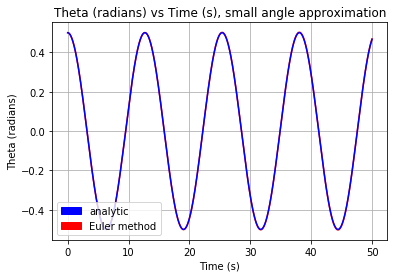

In [13]:
# Perform Euler's Method Here
theta1=np.zeros(len(t))
theta1[0]=theta0
dtheta=0
ddtheta=-omega0**2*theta1[0]

for i in range(len(t)-1):
    theta1[i+1] = theta1[i] + dtheta*dt
    dtheta += ddtheta*dt
    ddtheta = -omega0**2*theta1[i+1]

import matplotlib.patches as mpatches

plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Theta (radians)")
plt.title("Theta (radians) vs Time (s), small angle approximation")
blue_patch = mpatches.Patch(color = 'b', label = 'analytic')
red_patch = mpatches.Patch(color = 'r', label = 'Euler method')
plt.legend(handles=[blue_patch,red_patch],loc='lower left')
plt.plot(t,theta1,color='r')
plt.plot(t,theta,color='b')
plt.show()

You should have found that if you chose the time step size small enough, then the Euler's method solution was
indistinguishable from the analytic solution.  

We can now trivially modify this, to solve for the pendulum **exactly**, without using the small angle approximation.
The exact equation for the acceleration is

eq 8.) $\dfrac{d^2\theta}{dt^2} = -\dfrac{g}{l}\sin\theta$.

Modify your Euler's Forward method calculation to use eq (8) to calculate $\ddot{\theta}$ at each time step in the cell below.


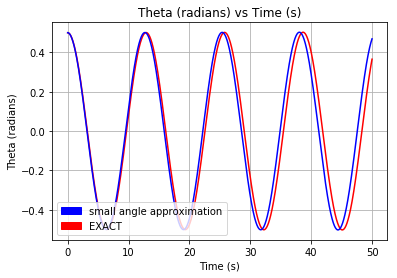

In [14]:
theta2=np.zeros(len(t))
theta2[0]=theta0
dtheta=0
ddtheta=-omega0**2*np.sin(theta2[0])

for i in range(len(t)-1):
    theta2[i+1] = theta2[i] + dtheta*dt
    dtheta += ddtheta*dt
    ddtheta = -omega0**2*np.sin(theta2[i+1])

plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Theta (radians)")
plt.title("Theta (radians) vs Time (s)")
blue_patch = mpatches.Patch(color = 'b', label = 'small angle approximation')
red_patch = mpatches.Patch(color = 'r', label = 'EXACT')
plt.legend(handles=[blue_patch,red_patch],loc='lower left')
plt.plot(t,theta2,color='r')
plt.plot(t,theta1,color='b')
plt.show()

# Q3.) What time step size did you use to find agreement between Euler's method and the analytic solution (in the small angle approximation)? How did the exact solution differ from the small angle approximation? 

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible answers #######

A time step of 0.001 was sufficient so that Euler's method and the analytic formula were indistinguishable in the plots (for small angle approximation).
(Different time steps could be found, depending on how closely one compared the plots.)

The exact pendulum solution has a slightly longer period than the small angle approximation (in agreement with what we learned last week.)

####### Possible answers #######

### Now let's do something fun:

In class we found that the 2-dimensional anisotropic harmonic motion can be solved as

eq 8a.) $x(t) = A_x \cos(\omega_xt)$

eq 8b.) $y(t) = A_y \cos(\omega_yt - \delta)$

If $\dfrac{\omega_x}{\omega_y}$ is a rational number (*i.e,* a ratio of two integers), then the trajectory repeats itself after some amount of time. The plots of $x$ vs $y$ in this case are called Lissajous figures (after the French physicists Jules Lissajous).  If $\dfrac{\omega_x}{\omega_y}$ is not a rational number, then the trajectory does not repeat itself, but it still shows some very interesting behavior.

Let's make some x vs y plots below for the 2-d anisotropic oscillator. 

First, recreate the plots in Figure 5.9 of Taylor.  (Hint: Let $A_x=A_y$. For the left plot of Figure 5.9, let $\delta=\pi/4$ and for the right plot, let $\delta=0$.)

Next, try other rational values of $\dfrac{\omega_x}{\omega_y}$ such as 5/6, 19/15, etc, and using different phase angles $\delta$.

Finally, for non-rational $\dfrac{\omega_x}{\omega_y}$, what does the trajectory plot look like if you let the length of time to be arbitrarily long?

\[For these parametric plots, it is preferable to use our original plotting method, *i.e.* using `plt.plot()`, as introduced in ***Notebook 1***.\]

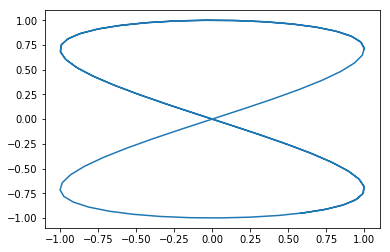

In [15]:
# Plot the Lissajous curves here
Ax=1
Ay=1
omegay=1

ti=0
tf=10
dt=0.1
t=np.arange(ti,tf,dt)

r=2
delta=np.pi/4

omegax=r*omegay

X=Ax*np.cos(omegax*t)
Y=Ay*np.cos(omegay*t-delta)

plt.plot(X,Y)


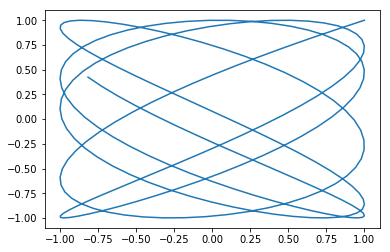

In [16]:
ti=0
tf=24.1
dt=0.1
t=np.arange(ti,tf,dt)

r=np.sqrt(2)
delta=0

omegax=r*omegay

X=Ax*np.cos(omegax*t)
Y=Ay*np.cos(omegay*t-delta)

plt.plot(X,Y)

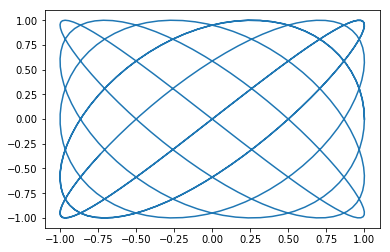

In [17]:
ti=0
tf=50
dt=0.1
t=np.arange(ti,tf,dt)

r=5/6
delta=np.pi/2

omegax=r*omegay

X=Ax*np.cos(omegax*t)
Y=Ay*np.cos(omegay*t-delta)

plt.plot(X,Y)

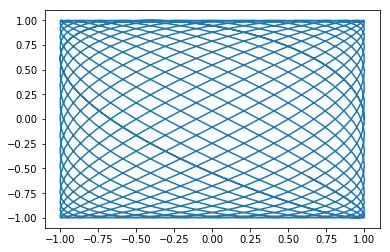

In [18]:
ti=0
tf=100
dt=0.1
t=np.arange(ti,tf,dt)

r=19/15
delta=np.pi/2

omegax=r*omegay

X=Ax*np.cos(omegax*t)
Y=Ay*np.cos(omegay*t-delta)

plt.plot(X,Y)

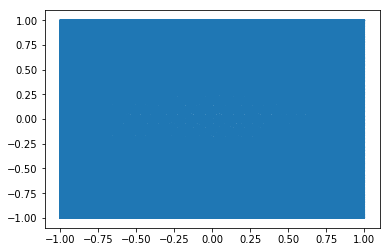

In [19]:
ti=0
tf=1000
dt=0.1
t=np.arange(ti,tf,dt)

r=np.sqrt(2)
delta=0

omegax=r*omegay

X=Ax*np.cos(omegax*t)
Y=Ay*np.cos(omegay*t-delta)

plt.plot(X,Y)

# Q4.) What are some observations you make as you play with the variables? What happens for non-rational $\omega_x/\omega_y$ if you let the oscillator run for a long time?


&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible answers #######

For rational $\omega_x/\omega_y = n/m$ the curve closes.  In general, the larger $n$ and $m$ (with no common factors) the longer it takes the curve to close.

For non-rational $\omega_x/\omega_y$, the curve essentially fills in the entire rectangle if you let it run to long enough time.

####### Possible answers #######

# Notebook Wrap-up. 
Run the cell below and copy-paste your answers into their corresponding cells.

In [20]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/1eopEhweWaPNQfyi7" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

# Well that's that, another Notebook! It's now been 10 weeks of class

You've been given lots of computational and programing tools these past few months. These past two weeks have been practicing these tools and hopefully you are understanding how some of these pieces add up. Play around with the code and see how it affects our systems of equations. Solve the Schrodinger Equation for the Helium atom. Figure out the unifying theory. The future is limitless!